In [1]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [112]:
#loading data
DDataFile = './data/D_VLOS_channelVectors_B32_U20000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './data/randLocationU20000VIP.mat'
locationData = sio.loadmat(LocationDataFile)

In [113]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = np.transpose(location_data[:2,:])
#get the real and imag part of row data
D_data = np.transpose(np.concatenate((np.real(D_data),np.imag(D_data))))

total, l = D_data.shape
total, d = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = D_data[:train_length, :]
location_train = location_data[:train_length,:]

impulses_test = D_data[train_length:, :]
location_test = location_data[train_length:,:]
print (impulses_train.shape, location_train.shape)


(16000, 64) (16000, 2)


In [158]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
model.add(Dropout(0.2)) # best 0.2
keras.layers.Conv1D(64, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(64, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.25)) # best 0.2
model.add(Dense(16, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

# keras.layers.normalization.BatchNormalization()
# model.add(Dropout(0.25)) # best 0.2
# model.add(Dense(128, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.25)) # best 0.2
model.add(Dense(128, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [159]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error  mean_absolute_error
opt_func = keras.optimizers.Adam(lr=0.001) # keras.optimizers.Adam(lr=0.001)  #  RMSprop  sgd  Adadelta   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [160]:
#Train the model, iterating
#early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 100, # 10,20
                    epochs = 400,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.1 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 14400 samples, validate on 1600 samples
Epoch 1/400
 - 2s - loss: 108422.1254 - mean_absolute_error: 292.2830 - val_loss: 97095.3945 - val_mean_absolute_error: 272.1628
Epoch 2/400
 - 0s - loss: 79686.8144 - mean_absolute_error: 241.3161 - val_loss: 67081.7878 - val_mean_absolute_error: 219.2431
Epoch 3/400
 - 0s - loss: 68204.2554 - mean_absolute_error: 218.4889 - val_loss: 61970.7185 - val_mean_absolute_error: 209.4622
Epoch 4/400
 - 0s - loss: 64105.7713 - mean_absolute_error: 211.0264 - val_loss: 56263.3000 - val_mean_absolute_error: 198.3052
Epoch 5/400
 - 0s - loss: 58059.4604 - mean_absolute_error: 199.6221 - val_loss: 47343.8408 - val_mean_absolute_error: 180.9679
Epoch 6/400
 - 0s - loss: 51910.8055 - mean_absolute_error: 187.6631 - val_loss: 39590.2339 - val_mean_absolute_error: 164.4970
Epoch 7/400
 - 0s - loss: 48260.8375 - mean_absolute_error: 180.3081 - val_loss: 35447.8354 - val_mean_absolute_error: 155.0835
Epoch 8/400
 - 0s - loss: 45672.8054 - mean_absolute_e

Epoch 65/400
 - 0s - loss: 23048.6172 - mean_absolute_error: 115.6172 - val_loss: 11813.2305 - val_mean_absolute_error: 88.3599
Epoch 66/400
 - 0s - loss: 23167.3507 - mean_absolute_error: 115.9244 - val_loss: 11642.8074 - val_mean_absolute_error: 87.5204
Epoch 67/400
 - 0s - loss: 23561.1395 - mean_absolute_error: 116.2886 - val_loss: 11473.3315 - val_mean_absolute_error: 87.0693
Epoch 68/400
 - 0s - loss: 23159.2368 - mean_absolute_error: 115.6228 - val_loss: 11509.3441 - val_mean_absolute_error: 86.6704
Epoch 69/400
 - 0s - loss: 23307.2330 - mean_absolute_error: 115.5489 - val_loss: 11431.8795 - val_mean_absolute_error: 86.9156
Epoch 70/400
 - 0s - loss: 23063.8795 - mean_absolute_error: 115.3627 - val_loss: 11426.5262 - val_mean_absolute_error: 86.6912
Epoch 71/400
 - 0s - loss: 23139.6635 - mean_absolute_error: 114.7406 - val_loss: 11409.1006 - val_mean_absolute_error: 86.7825
Epoch 72/400
 - 0s - loss: 23094.3607 - mean_absolute_error: 115.1884 - val_loss: 11138.4963 - val_mean_

Epoch 129/400
 - 0s - loss: 21219.5754 - mean_absolute_error: 109.0401 - val_loss: 10102.4960 - val_mean_absolute_error: 81.0685
Epoch 130/400
 - 0s - loss: 21183.2978 - mean_absolute_error: 109.1496 - val_loss: 10238.7368 - val_mean_absolute_error: 81.9335
Epoch 131/400
 - 0s - loss: 20735.4276 - mean_absolute_error: 108.2261 - val_loss: 10303.6379 - val_mean_absolute_error: 82.2003
Epoch 132/400
 - 0s - loss: 21229.5764 - mean_absolute_error: 108.6255 - val_loss: 9972.0005 - val_mean_absolute_error: 80.5262
Epoch 133/400
 - 0s - loss: 21017.1463 - mean_absolute_error: 108.7869 - val_loss: 10147.7924 - val_mean_absolute_error: 81.3930
Epoch 134/400
 - 0s - loss: 21168.1409 - mean_absolute_error: 108.8106 - val_loss: 10058.4931 - val_mean_absolute_error: 81.2204
Epoch 135/400
 - 0s - loss: 20893.4606 - mean_absolute_error: 108.4413 - val_loss: 10145.9234 - val_mean_absolute_error: 81.5915
Epoch 136/400
 - 0s - loss: 21412.8066 - mean_absolute_error: 109.8186 - val_loss: 10186.9628 - va

Epoch 193/400
 - 0s - loss: 19434.7566 - mean_absolute_error: 103.2211 - val_loss: 9409.5138 - val_mean_absolute_error: 78.8041
Epoch 194/400
 - 0s - loss: 19416.4806 - mean_absolute_error: 102.6623 - val_loss: 9134.8467 - val_mean_absolute_error: 77.4169
Epoch 195/400
 - 0s - loss: 19261.4822 - mean_absolute_error: 103.1786 - val_loss: 9417.0366 - val_mean_absolute_error: 78.9158
Epoch 196/400
 - 0s - loss: 19363.6566 - mean_absolute_error: 102.7619 - val_loss: 9258.0145 - val_mean_absolute_error: 78.0706
Epoch 197/400
 - 0s - loss: 19967.9366 - mean_absolute_error: 103.9586 - val_loss: 9022.6249 - val_mean_absolute_error: 76.8912
Epoch 198/400
 - 0s - loss: 19636.2006 - mean_absolute_error: 103.4966 - val_loss: 9064.1984 - val_mean_absolute_error: 77.3083
Epoch 199/400
 - 0s - loss: 19864.3258 - mean_absolute_error: 104.0939 - val_loss: 9081.0755 - val_mean_absolute_error: 77.2214
Epoch 200/400
 - 0s - loss: 19511.2403 - mean_absolute_error: 103.3521 - val_loss: 9222.3157 - val_mean_

 - 0s - loss: 18140.2462 - mean_absolute_error: 98.8941 - val_loss: 9191.2393 - val_mean_absolute_error: 78.2583
Epoch 258/400
 - 0s - loss: 18702.0779 - mean_absolute_error: 99.8375 - val_loss: 9169.4849 - val_mean_absolute_error: 78.1390
Epoch 259/400
 - 0s - loss: 18328.5909 - mean_absolute_error: 99.4482 - val_loss: 8939.7383 - val_mean_absolute_error: 77.0213
Epoch 260/400
 - 0s - loss: 18567.0955 - mean_absolute_error: 99.7604 - val_loss: 8833.4190 - val_mean_absolute_error: 76.5702
Epoch 261/400
 - 0s - loss: 18737.3321 - mean_absolute_error: 100.3372 - val_loss: 9042.8311 - val_mean_absolute_error: 77.6443
Epoch 262/400
 - 0s - loss: 18249.0803 - mean_absolute_error: 99.4021 - val_loss: 8807.2843 - val_mean_absolute_error: 76.5325
Epoch 263/400
 - 0s - loss: 18136.9441 - mean_absolute_error: 99.4955 - val_loss: 8863.4598 - val_mean_absolute_error: 76.7244
Epoch 264/400
 - 0s - loss: 18707.4839 - mean_absolute_error: 100.2054 - val_loss: 9115.3069 - val_mean_absolute_error: 77.8

Epoch 322/400
 - 0s - loss: 17640.1285 - mean_absolute_error: 96.9912 - val_loss: 8634.7311 - val_mean_absolute_error: 75.8524
Epoch 323/400
 - 0s - loss: 17570.4450 - mean_absolute_error: 97.0304 - val_loss: 8877.3208 - val_mean_absolute_error: 76.9850
Epoch 324/400
 - 0s - loss: 17748.9306 - mean_absolute_error: 97.1249 - val_loss: 9093.2691 - val_mean_absolute_error: 77.8144
Epoch 325/400
 - 0s - loss: 17512.6802 - mean_absolute_error: 96.8060 - val_loss: 9162.3391 - val_mean_absolute_error: 78.3988
Epoch 326/400
 - 0s - loss: 17637.2278 - mean_absolute_error: 97.1613 - val_loss: 8714.5867 - val_mean_absolute_error: 76.2900
Epoch 327/400
 - 0s - loss: 17561.2604 - mean_absolute_error: 97.2107 - val_loss: 8862.1242 - val_mean_absolute_error: 76.9365
Epoch 328/400
 - 0s - loss: 17886.6438 - mean_absolute_error: 97.9088 - val_loss: 9051.9398 - val_mean_absolute_error: 77.6270
Epoch 329/400
 - 0s - loss: 17758.1169 - mean_absolute_error: 97.3732 - val_loss: 8979.4344 - val_mean_absolute

Epoch 387/400
 - 0s - loss: 17160.8738 - mean_absolute_error: 94.8651 - val_loss: 8678.3969 - val_mean_absolute_error: 76.0362
Epoch 388/400
 - 0s - loss: 17358.3505 - mean_absolute_error: 95.5447 - val_loss: 8905.2485 - val_mean_absolute_error: 77.1897
Epoch 389/400
 - 0s - loss: 17185.0409 - mean_absolute_error: 94.8094 - val_loss: 8654.4880 - val_mean_absolute_error: 75.9650
Epoch 390/400
 - 0s - loss: 17214.0639 - mean_absolute_error: 95.0451 - val_loss: 9006.4948 - val_mean_absolute_error: 77.5928
Epoch 391/400
 - 0s - loss: 17279.2657 - mean_absolute_error: 95.2780 - val_loss: 8906.9596 - val_mean_absolute_error: 77.1446
Epoch 392/400
 - 0s - loss: 17258.4489 - mean_absolute_error: 94.9716 - val_loss: 9082.1076 - val_mean_absolute_error: 77.8542
Epoch 393/400
 - 0s - loss: 17303.9803 - mean_absolute_error: 95.2928 - val_loss: 8976.0352 - val_mean_absolute_error: 77.6204
Epoch 394/400
 - 0s - loss: 17346.4557 - mean_absolute_error: 95.8336 - val_loss: 8951.0941 - val_mean_absolute

In [162]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(4000, 2)
(4000, 2)


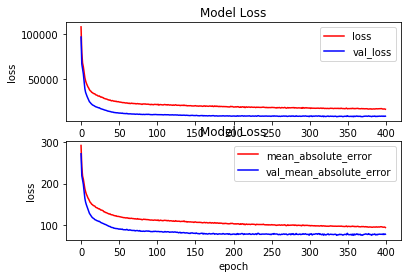

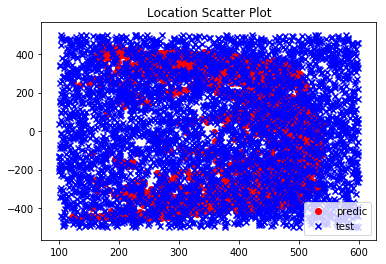

In [163]:
#plot the loss data
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(212)
plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [ ]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

In [ ]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)
# err_abs_mean = np.mean(err_abs)
# print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,300,15)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


In [ ]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

In [ ]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")